## AMIT VERMA

# Problem Statement

The goal of this project is to conduct a comprehensive analysis of how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19. Unemployment is a crucial economic and social issue that affects individuals, communities, and the overall health of a nation's economy.

# Import libraries

In [ ]:
# for numerical operations
import pandas as pd
import numpy as np

# for date column
import datetime

# for graphical visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.io as pio

# Loading Dataset

In [ ]:
dataset = pd.read_csv("/content/Unemployment in India.csv")
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Analysing Dataset
Exploring the descriptive statistics of the variables.

In [ ]:
# for name of the columns
dataset.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
# no. of rows and columns in dataset
print("rows:", dataset.shape[0], "columns:", dataset.shape[1])

rows: 768 columns: 7


In [ ]:
# overall information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
# another way to identify data types
dataset.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
# Mathematical perspective in dataset
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Data Preprocessing

In [ ]:
# Change column names using rename() method
new_column_name = {" Date": "Date",
                   " Frequency":"Frequency",
                   " Estimated Unemployment Rate (%)":"Estimated Unemployment Rate(%)",
                   " Estimated Employed":"Estimated Employed",
                   " Estimated Labour Participation Rate (%)":"Estimated Labour Participation Rate(%)"}
df1 = dataset.rename(columns=new_column_name)

In [ ]:
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate(%)',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)', 'Area'],
      dtype='object')

# Check for any missing value in data set and treat it

In [ ]:
df1.isnull().sum() # or df1.isna().sum()

Region                                    28
Date                                      28
Frequency                                 28
Estimated Unemployment Rate(%)            28
Estimated Employed                        28
Estimated Labour Participation Rate(%)    28
Area                                      28
dtype: int64

In [ ]:


# before dropping
df1.shape

(768, 7)

# Drop Null Records

In [ ]:
# axis=0 means operation on rows
df1.dropna(axis=0, inplace=True)

In [ ]:
df1.isna().sum()

Region                                    0
Date                                      0
Frequency                                 0
Estimated Unemployment Rate(%)            0
Estimated Employed                        0
Estimated Labour Participation Rate(%)    0
Area                                      0
dtype: int64

In [ ]:
# shape of the dataframe after dropping null records
df1.shape

(740, 7)

# Check for duplicated values ( records ) in our dataframe

In [ ]:
# note :- duplicated() function returns boolean values
#  False - >  duplicated record not found
#  True  - > duplicated record found

# total number of duplicated records in our dataframe
df1.duplicated().sum()

0

In [ ]:
# after changes
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate(%),Estimated Employed,Estimated Labour Participation Rate(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Creating new columns from 'Date' columns
# First of all, we need to convert ['Date'] dtype into datetime

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.dtypes

Region                                            object
Date                                      datetime64[ns]
Frequency                                         object
Estimated Unemployment Rate(%)                   float64
Estimated Employed                               float64
Estimated Labour Participation Rate(%)           float64
Area                                              object
dtype: object

In [ ]:
# Creating day column from unemp_df['Date']
df1['Day'] = df1['Date'].dt.day

In [ ]:
# Creating month column from unemp_df['Date']
df1['month'] = df1['Date'].dt.month_name()

In [ ]:
# Creating year column from unemp_df['Date']
df1['year'] = df1['Date'].dt.year

In [ ]:
# after changes
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate(%),Estimated Employed,Estimated Labour Participation Rate(%),Area,Day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


# Exploratory Data Analysis (EDA)

In [ ]:
# final total columns name
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate(%)',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)', 'Area',
       'Day', 'month', 'year'],
      dtype='object')

In [ ]:
# value count for each category in ['Region'] column
df1['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

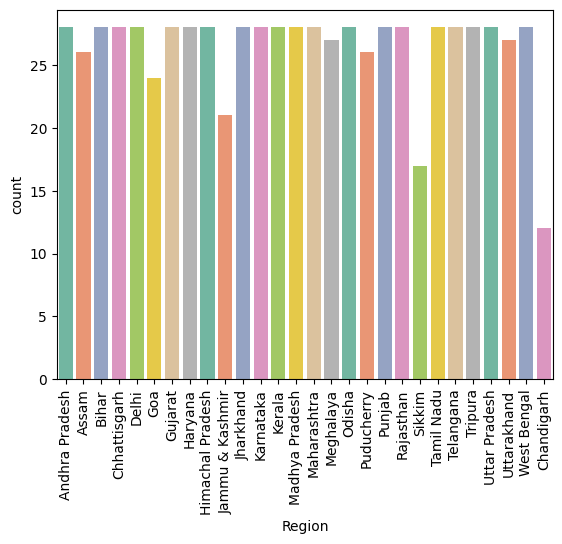

In [ ]:
# Value count for each state using count plot

# palette is for color patterns
# ex-: Set1,Set2,Set3, Dark2, BrBG  etc

sns.countplot(x=df1['Region'], palette = "Set2")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# unemployement rate in each state of India
import plotly.express as px

fig = px.box(df1,x='Region',y='Estimated Unemployment Rate(%)', color='Region', title='Unemployment Rate(%)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Average Unemployment Rate in each Region of India

In [ ]:
# select columns
columns = df1[['Estimated Unemployment Rate(%)','Region']]

# average Unemployment Rate of each state and give index to each
df_unemp = columns.groupby('Region').mean().reset_index()

# Arrange the values('region') in descending order according to Unemployment Rate
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate(%)')

fig = px.bar(df_unemp, x='Region',y='Estimated Unemployment Rate(%)',color='Region',
            title='Average Unemployment Rate in each Region')

fig.show()

# Average Unemployment Rate in Particular Area

In [ ]:
# value count for each category in ['Area'] column
df1['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [ ]:
# select columns
columns = df1[['Estimated Unemployment Rate(%)','Area']]

# average Unemployment Rate of each area and give index to each
df_unemp = columns.groupby('Area').mean().reset_index()

# Arrange the values('Area') in descending order according to Unemployment Rate
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate(%)')

fig = px.bar(df_unemp, x='Area',y='Estimated Unemployment Rate(%)',color='Area',
            title='Average Unemployment Rate in each Area of the Country', width=700, height=500)

fig.show()

(2018.0, 2021.0)

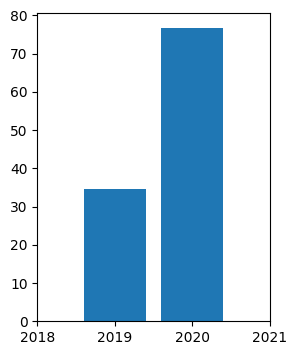

In [ ]:
plt.figure(figsize=(3,4))
plt.bar(df1['year'], df1['Estimated Unemployment Rate(%)'])
plt.xlim(2018, 2021)

# Avg. Unemployment Rate in Area of each Region

In [ ]:
# Group the DataFrame by 'Region' and 'Area' and calculate the mean of 'Estimated Unemployment Rate(%)'
group = df1.groupby(['Region','Area'])["Estimated Unemployment Rate(%)"].mean().reset_index()
print(group)

              Region   Area  Estimated Unemployment Rate(%)
0     Andhra Pradesh  Rural                        5.526429
1     Andhra Pradesh  Urban                        9.427857
2              Assam  Rural                        4.490833
3              Assam  Urban                        8.088571
4              Bihar  Rural                       16.770000
5              Bihar  Urban                       21.066429
6         Chandigarh  Urban                       15.991667
7       Chhattisgarh  Rural                        6.628571
8       Chhattisgarh  Urban                       11.852143
9              Delhi  Rural                       15.258571
10             Delhi  Urban                       17.732143
11               Goa  Rural                        8.390000
12               Goa  Urban                       10.158333
13           Gujarat  Rural                        5.917143
14           Gujarat  Urban                        7.410714
15           Haryana  Rural             

# Impact of Lockdown on Employment across States

In [ ]:
lowestDate = df1['Date'].min().date()
highestDate = df1['Date'].max().date()
print(f"Data gathered betweeen {lowestDate} to {highestDate}")

Data gathered betweeen 2019-05-31 to 2020-06-30


In [ ]:
# select the entries after the locakdown and before lockdown
af_lock = df1[(df1['Date'] >= "24/03/2020")]
bf_lock = df1[(df1['Date'] < "24/03/2020")]

<ipython-input-33-4116929bf66a>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-33-4116929bf66a>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
# group the data in region and get the mean
group_af = af_lock.groupby("Region")["Estimated Unemployment Rate(%)"].mean().reset_index()
# group_af

In [ ]:
group_bf = bf_lock.groupby("Region")["Estimated Unemployment Rate(%)"].mean().reset_index()
# group_bf

In [ ]:
# compare the Unemployment Rate before and after lockdown
group_states = df1.groupby("Region").mean().reset_index()
group_states["Unemployment Rate before lockdown"] = group_bf["Estimated Unemployment Rate(%)"]
group_states["Unemployment Rate after lockdown"] = group_af["Estimated Unemployment Rate(%)"]

group_states.loc[:, ['Region', 'Unemployment Rate before lockdown', 'Unemployment Rate after lockdown']]

<ipython-input-36-d09fcf183f52>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Region,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,5.037500,13.576250
1,Assam,6.372632,6.578571
2,Bihar,13.833000,31.631250
3,Chandigarh,16.325000,14.325000
4,Chhattisgarh,7.706500,13.075000
5,Delhi,14.230500,22.157500
6,Goa,8.507500,13.107500
7,Gujarat,5.176000,10.383750
8,Haryana,22.935500,34.652500
9,Himachal Pradesh,19.129000,17.068750


In [ ]:
# percentage change in unemployment rate due to COVID-19
group_states['percentage change in unemployment'] = round(group_states['Unemployment Rate after lockdown'] - group_states['Unemployment Rate before lockdown']/group_states['Unemployment Rate before lockdown'],2)

# sort the values
plot_per = group_states.sort_values('percentage change in unemployment')

In [ ]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='Region',y='percentage change in unemployment', color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

In [ ]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x

In [ ]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [ ]:
fig = px.bar(plot_per, y='Region',x='percentage change in unemployment', color='impact status',
            title='Impact of lockdown on employment across states', template='ggplot2', height=650)


fig.show()